# 1. data input

In [5]:
#1.data input
import numpy as np
from io import StringIO
import csv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random
import pandas as pd

iris_data = pd.read_fwf("iris.data",delimiter=',', header=None)
agar_data = pd.read_fwf("agaricus-lepiota.data",delimiter=',',header=None)


# 2. data visualization

data visualization for Iris dataset

average frequency of sepal_length is :  5.843333333333335
average frequency of sepal_width is :  3.0540000000000007
average frequency of petal_length is :  3.7586666666666693
average frequency of petal_width is :  1.1986666666666672
standard deviation of sepal_length is :  0.8253012917851409
standard deviation of sepal_width is :  0.4321465800705435
standard deviation of petal_length is :  1.7585291834055201
standard deviation of petal_width is :  0.760612618588172


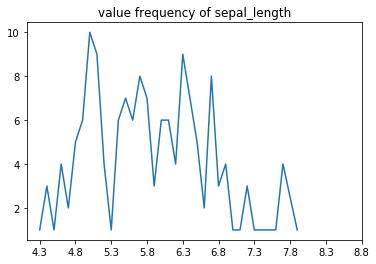

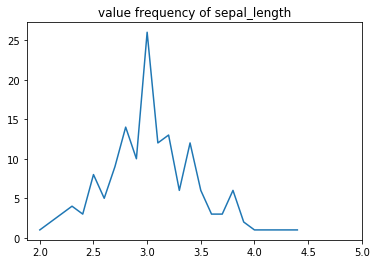

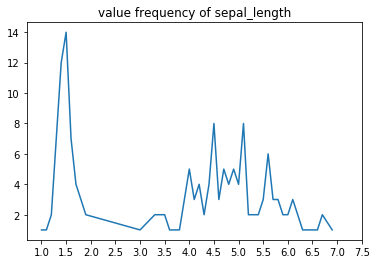

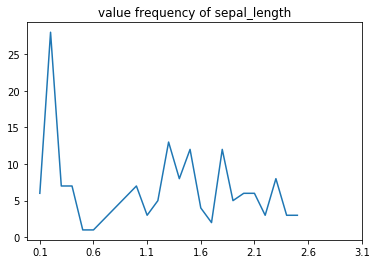

data frequency of each feature(agaricus-lepiota)



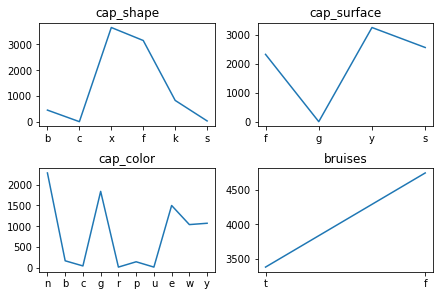

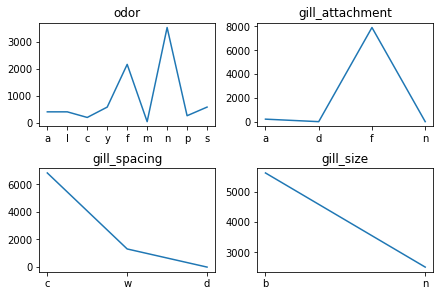

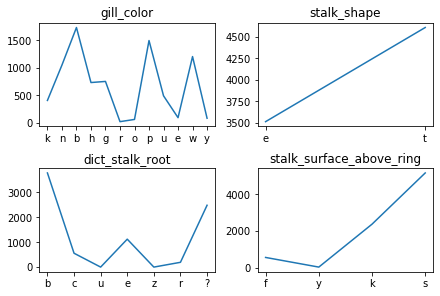

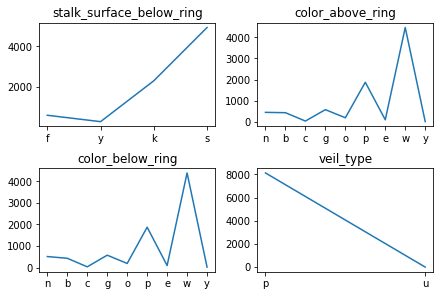

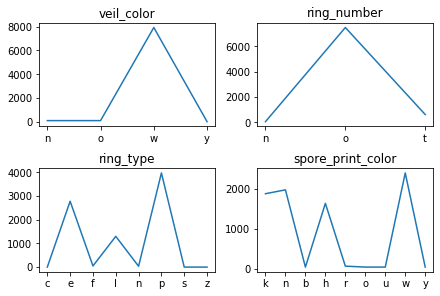

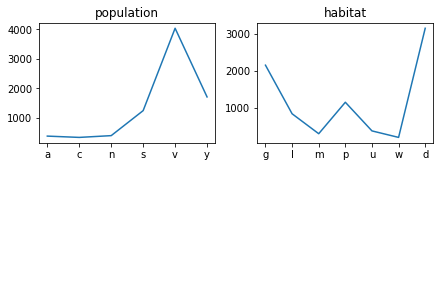

In [8]:
#data visualization

print("data visualization for Iris dataset\n")
#average frequency for each feature(iris)
sepal_length_count = 0
sepal_width_count = 0
petal_length_count = 0
petal_width_count = 0

iris_list_x = []

for i in range(len(iris_data)-1):
    list_now = []
    for j in range(len(iris_data.iloc[i])-1):
        list_now.append(float(iris_data.iloc[i][j]))
    iris_list_x.append(list_now)


for i in range(len(iris_list_x)):
    sepal_length_count += iris_list_x[i][0]
    sepal_width_count += iris_list_x[i][1]
    petal_length_count += iris_list_x[i][2]
    petal_width_count += iris_list_x[i][3]

sepal_length_count /= len(iris_list_x)
sepal_width_count /= len(iris_list_x)
petal_length_count /= len(iris_list_x)
petal_width_count /= len(iris_list_x)

print("average frequency of sepal_length is : ",sepal_length_count)
print("average frequency of sepal_width is : ",sepal_width_count)
print("average frequency of petal_length is : ",petal_length_count)
print("average frequency of petal_width is : ",petal_width_count)


#standard deviation of each feature
sd_sepal_length = 0
sd_sepal_width = 0
sd_petal_length = 0
sd_petal_width = 0
sum_sepal_length = 0
sum_sepal_width = 0
sum_petal_length = 0
sum_petal_width = 0
for i in range(len(iris_list_x)):
    sum_sepal_length += (iris_list_x[i][0] - sepal_length_count)**2
    sum_sepal_width += (iris_list_x[i][1] - sepal_width_count)**2
    sum_petal_length += (iris_list_x[i][2] - petal_length_count)**2
    sum_petal_width += (iris_list_x[i][3] - petal_width_count)**2

sd_sepal_length = (sum_sepal_length/len(iris_list_x))**0.5
sd_sepal_width = (sum_sepal_width/len(iris_list_x))**0.5
sd_petal_length = (sum_petal_length/len(iris_list_x))**0.5
sd_petal_width = (sum_petal_width/len(iris_list_x))**0.5

print("standard deviation of sepal_length is : ",sd_sepal_length)
print("standard deviation of sepal_width is : ",sd_sepal_width)
print("standard deviation of petal_length is : ",sd_petal_length)
print("standard deviation of petal_width is : ",sd_petal_width)

#data frequency of each feature(iris)
dict_sepal_length = {}
dict_sepal_width = {}
dict_petal_length = {}
dict_petal_width = {}

for i in range(len(iris_list_x)):
    if iris_list_x[i][0] in dict_sepal_length:
        dict_sepal_length[iris_list_x[i][0]] += 1
    else:
        dict_sepal_length[iris_list_x[i][0]] = 1
        
    if iris_list_x[i][1] in dict_sepal_width:
        dict_sepal_width[iris_list_x[i][1]] += 1
    else:
        dict_sepal_width[iris_list_x[i][1]] = 1
        
    if iris_list_x[i][2] in dict_petal_length:
        dict_petal_length[iris_list_x[i][2]] += 1
    else:
        dict_petal_length[iris_list_x[i][2]] = 1
        
    if iris_list_x[i][3] in dict_petal_width:
        dict_petal_width[iris_list_x[i][3]] += 1
    else:
        dict_petal_width[iris_list_x[i][3]] = 1
        
        
# build graph for each feature
x_list = sorted(dict_sepal_length.keys())
y_list = []
for key in x_list:
    y_list.append(dict_sepal_length[key])
plt.plot(x_list,y_list)
plt.title("value frequency of sepal_length")
plt.xticks(np.arange(min(x_list), max(x_list)+1,0.5))
plt.show()

x_list = sorted(dict_sepal_width.keys())
y_list = []
for key in x_list:
    y_list.append(dict_sepal_width[key])
plt.plot(x_list,y_list)
plt.title("value frequency of sepal_length")
plt.xticks(np.arange(min(x_list), max(x_list)+1,0.5))
plt.show()

x_list = sorted(dict_petal_length.keys())
y_list = []
for key in x_list:
    y_list.append(dict_petal_length[key])
plt.plot(x_list,y_list)
plt.title("value frequency of sepal_length")
plt.xticks(np.arange(min(x_list), max(x_list)+1,0.5))
plt.show()

x_list = sorted(dict_petal_width.keys())
y_list = []
for key in x_list:
    y_list.append(dict_petal_width[key])
plt.plot(x_list,y_list)
plt.title("value frequency of sepal_length")
plt.xticks(np.arange(min(x_list), max(x_list)+1,0.5))
plt.show()


#data frequency of each feature(agaricus-lepiota)
print("data frequency of each feature(agaricus-lepiota)\n")
#cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
dict_cap_shape = {'b':0,'c':0,'x':0,'f':0,'k':0,'s':0}

#cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
dict_cap_surface = {'f':0,'g':0,'y':0,'s':0}

#cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
dict_cap_color = {'n':0,'b':0,'c':0,'g':0,'r':0,'p':0,'u':0,'e':0,'w':0,'y':0}

#bruises?: bruises=t,no=f
dict_bruises = {'t':0,'f':0}

#odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
dict_odor = {'a':0,'l':0,'c':0,'y':0,'f':0,'m':0,'n':0,'p':0,'s':0}

#gill-attachment: attached=a,descending=d,free=f,notched=n
dict_gill_attachment = {'a':0,'d':0,'f':0,'n':0}

#gill-spacing: close=c,crowded=w,distant=d
dict_gill_spacing = {'c':0,'w':0,'d':0}

#gill-size: broad=b,narrow=n
dict_gill_size = {'b':0,'n':0}

#gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
dict_gill_color = {'k':0,'n':0,'b':0,'h':0,'g':0,'r':0,'o':0,'p':0,'u':0,'e':0,'w':0,'y':0}

#stalk-shape: enlarging=e,tapering=t
dict_stalk_shape = {'e':0,'t':0,}

#stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r, missing=?
dict_stalk_root = {'b':0,'c':0,'u':0,'e':0,'z':0,'r':0,'?':0}

#stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
dict_stalk_surface_above_ring = {'f':0,'y':0,'k':0,'s':0}

#stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
dict_stalk_surface_below_ring = {'f':0,'y':0,'k':0,'s':0}

#stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
dict_stalk_color_above_ring = {'n':0,'b':0,'c':0,'g':0,'o':0,'p':0,'e':0,'w':0,'y':0}

#stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
dict_stalk_color_below_ring = {'n':0,'b':0,'c':0,'g':0,'o':0,'p':0,'e':0,'w':0,'y':0}

#veil-type: partial=p,universal=u
dict_veil_type = {'p':0,'u':0}

#veil-color: brown=n,orange=o,white=w,yellow=y
dict_veil_color = {'n':0,'o':0,'w':0,'y':0}

#ring-number: none=n,one=o,two=t
dict_ring_number = {'n':0,'o':0,'t':0}

#ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
dict_ring_type = {'c':0,'e':0,'f':0,'l':0,'n':0,'p':0,'s':0,'z':0}

#spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
dict_spore_print_color = {'k':0,'n':0,'b':0,'h':0,'r':0,'o':0,'u':0,'w':0,'y':0}

#population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
dict_population = {'a':0,'c':0,'n':0,'s':0,'v':0,'y':0}

#habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
dict_habitat = {'g':0,'l':0,'m':0,'p':0,'u':0,'w':0,'d':0}


agar_data2 = pd.read_fwf("agaricus-lepiota.data",delimiter=',',header=None)
agar_feature_extract = []
for i in range(len(agar_data2)):
    list_now = []
    for j in range(len(agar_data2.iloc[i])):
        if j is not 0:
            list_now.append(ord(agar_data2.iloc[i][j]))
    agar_feature_extract.append(list_now)
    
for i in range(len(agar_feature_extract)):
    #cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
    dict_cap_shape[chr(agar_feature_extract[i][0])] += 1
    
    #cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
    dict_cap_surface[chr(agar_feature_extract[i][1])] += 1
    
    #cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
    dict_cap_color[chr(agar_feature_extract[i][2])] += 1
    
    #bruises?: bruises=t,no=f
    dict_bruises[chr(agar_feature_extract[i][3])] += 1

    #odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
    dict_odor[chr(agar_feature_extract[i][4])] += 1

    #gill-attachment: attached=a,descending=d,free=f,notched=n
    dict_gill_attachment[chr(agar_feature_extract[i][5])] += 1

    #gill-spacing: close=c,crowded=w,distant=d
    dict_gill_spacing[chr(agar_feature_extract[i][6])] += 1

    #gill-size: broad=b,narrow=n
    dict_gill_size[chr(agar_feature_extract[i][7])] += 1

    #gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
    dict_gill_color[chr(agar_feature_extract[i][8])] += 1

    #stalk-shape: enlarging=e,tapering=t
    dict_stalk_shape[chr(agar_feature_extract[i][9])] += 1

    #stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r, missing=?
    dict_stalk_root[chr(agar_feature_extract[i][10])] += 1

    #stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    dict_stalk_surface_above_ring[chr(agar_feature_extract[i][11])] += 1

    #stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    dict_stalk_surface_below_ring[chr(agar_feature_extract[i][12])] += 1

    #stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
    dict_stalk_color_above_ring[chr(agar_feature_extract[i][13])] += 1

    #stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
    dict_stalk_color_below_ring[chr(agar_feature_extract[i][14])] += 1

    #veil-type: partial=p,universal=u
    dict_veil_type[chr(agar_feature_extract[i][15])] += 1

    #veil-color: brown=n,orange=o,white=w,yellow=y
    dict_veil_color[chr(agar_feature_extract[i][16])] += 1

    #ring-number: none=n,one=o,two=t
    dict_ring_number[chr(agar_feature_extract[i][17])] += 1
    
    #ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
    dict_ring_type[chr(agar_feature_extract[i][18])] += 1

    #spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
    dict_spore_print_color[chr(agar_feature_extract[i][19])] += 1

    #population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
    dict_population[chr(agar_feature_extract[i][20])] += 1

    #habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
    dict_habitat[chr(agar_feature_extract[i][21])] += 1



fig_group1 = plt.figure(constrained_layout=True)
spec_1 = gridspec.GridSpec(ncols=2,nrows=2,figure=fig_group1)
f_cap_shape = fig_group1.add_subplot(spec_1[0,0])
f_cap_surface = fig_group1.add_subplot(spec_1[0,1])
f_cap_color = fig_group1.add_subplot(spec_1[1,0])
f_bruises = fig_group1.add_subplot(spec_1[1,1])

fig_group2 = plt.figure(constrained_layout=True)
spec_2 = gridspec.GridSpec(ncols=2,nrows=2,figure=fig_group2)
f_odor = fig_group2.add_subplot(spec_2[0,0])
f_gill_attachment = fig_group2.add_subplot(spec_2[0,1])
f_gill_spacing = fig_group2.add_subplot(spec_2[1,0])
f_gill_size = fig_group2.add_subplot(spec_2[1,1])

fig_group3 = plt.figure(constrained_layout=True)
spec_3 = gridspec.GridSpec(ncols=2,nrows=2,figure=fig_group3)
f_gill_color = fig_group3.add_subplot(spec_3[0,0])
f_stalk_shape = fig_group3.add_subplot(spec_3[0,1])
f_dict_stalk_root = fig_group3.add_subplot(spec_3[1,0])
f_stalk_surface_above_ring = fig_group3.add_subplot(spec_3[1,1])

fig_group4 = plt.figure(constrained_layout=True)
spec_4 = gridspec.GridSpec(ncols=2,nrows=2,figure=fig_group4)
f_stalk_surface_below_ring = fig_group4.add_subplot(spec_4[0,0])
f_color_above_ring = fig_group4.add_subplot(spec_4[0,1])
f_color_below_ring = fig_group4.add_subplot(spec_4[1,0])
f_veil_type = fig_group4.add_subplot(spec_4[1,1])


fig_group5 = plt.figure(constrained_layout=True)
spec_5 = gridspec.GridSpec(ncols=2,nrows=2,figure=fig_group5)
f_veil_color = fig_group5.add_subplot(spec_5[0,0])
f_ring_number = fig_group5.add_subplot(spec_5[0,1])
f_ring_type = fig_group5.add_subplot(spec_5[1,0])
f_spore_print_color = fig_group5.add_subplot(spec_5[1,1])

fig_group6 = plt.figure(constrained_layout=True)
spec_6 = gridspec.GridSpec(ncols=2,nrows=2,figure=fig_group6)
f_population = fig_group6.add_subplot(spec_6[0,0])
f_habitat = fig_group6.add_subplot(spec_6[0,1])


x_list = []
y_list = []
for key,values in dict_cap_shape.items():
    x_list.append(key)
    y_list.append(values)
f_cap_shape.set_title("cap_shape")
f_cap_shape.plot(x_list,y_list)

x_list = []
y_list = []
for key,values in dict_cap_surface.items():
    x_list.append(key)
    y_list.append(values)
f_cap_surface.set_title("cap_surface")
f_cap_surface.plot(x_list,y_list)

x_list = []
y_list = []
for key,values in dict_cap_color.items():
    x_list.append(key)
    y_list.append(values)
f_cap_color.set_title("cap_color")
f_cap_color.plot(x_list,y_list)

x_list = []
y_list = []
for key,values in dict_bruises.items():
    x_list.append(key)
    y_list.append(values)
f_bruises.set_title("bruises")
f_bruises.plot(x_list,y_list)

x_list = []
y_list = []
for key,values in dict_odor.items():
    x_list.append(key)
    y_list.append(values)
f_odor.set_title("odor")
f_odor.plot(x_list,y_list)

x_list = []
y_list = []
for key,values in dict_gill_attachment.items():
    x_list.append(key)
    y_list.append(values)
f_gill_attachment.set_title("gill_attachment")
f_gill_attachment.plot(x_list,y_list)

x_list = []
y_list = []
for key,values in dict_gill_spacing.items():
    x_list.append(key)
    y_list.append(values)
f_gill_spacing.set_title("gill_spacing")
f_gill_spacing.plot(x_list,y_list)

x_list = []
y_list = []
for key,values in dict_gill_size.items():
    x_list.append(key)
    y_list.append(values)
f_gill_size.set_title("gill_size")
f_gill_size.plot(x_list,y_list)

x_list = []
y_list = []
for key,values in dict_gill_color.items():
    x_list.append(key)
    y_list.append(values)
f_gill_color.set_title("gill_color")
f_gill_color.plot(x_list,y_list)

x_list = []
y_list = []
for key,values in dict_stalk_shape.items():
    x_list.append(key)
    y_list.append(values)
f_stalk_shape.set_title("stalk_shape")
f_stalk_shape.plot(x_list,y_list)

x_list = []
y_list = []
for key,values in dict_stalk_root.items():
    x_list.append(key)
    y_list.append(values)
f_dict_stalk_root.set_title("stalk_root")
f_dict_stalk_root.plot(x_list,y_list)

x_list = []
y_list = []
for key,values in dict_stalk_surface_above_ring.items():
    x_list.append(key)
    y_list.append(values)
f_stalk_surface_above_ring.set_title("stalk_surface_above_ring")
f_stalk_surface_above_ring.plot(x_list,y_list)

x_list = []
y_list = []
for key,values in dict_stalk_surface_below_ring.items():
    x_list.append(key)
    y_list.append(values)
f_stalk_surface_below_ring.set_title("stalk_surface_below_ring")    
f_stalk_surface_below_ring.plot(x_list,y_list)

x_list = []
y_list = []
for key,values in dict_stalk_color_above_ring.items():
    x_list.append(key)
    y_list.append(values)
f_color_above_ring.set_title("color_above_ring")
f_color_above_ring.plot(x_list,y_list)

x_list = []
y_list = []
for key,values in dict_stalk_color_below_ring.items():
    x_list.append(key)
    y_list.append(values)
f_color_below_ring.set_title("color_below_ring")
f_color_below_ring.plot(x_list,y_list)

x_list = []
y_list = []
for key,values in dict_veil_type.items():
    x_list.append(key)
    y_list.append(values)
f_veil_type.set_title("veil_type")
f_veil_type.plot(x_list,y_list)

x_list = []
y_list = []
for key,values in dict_veil_color.items():
    x_list.append(key)
    y_list.append(values)
f_veil_color.set_title("veil_color")
f_veil_color.plot(x_list,y_list)

x_list = []
y_list = []
for key,values in dict_ring_number.items():
    x_list.append(key)
    y_list.append(values)
f_ring_number.set_title("ring_number")
f_ring_number.plot(x_list,y_list)

x_list = []
y_list = []
for key,values in dict_ring_type.items():
    x_list.append(key)
    y_list.append(values)
f_ring_type.set_title("ring_type")
f_ring_type.plot(x_list,y_list)

x_list = []
y_list = []
for key,values in dict_spore_print_color.items():
    x_list.append(key)
    y_list.append(values)
f_spore_print_color.set_title("spore_print_color")
f_spore_print_color.plot(x_list,y_list)

x_list = []
y_list = []
for key,values in dict_population.items():
    x_list.append(key)
    y_list.append(values)
f_population.set_title("population")
f_population.plot(x_list,y_list)

x_list = []
y_list = []
for key,values in dict_habitat.items():
    x_list.append(key)
    y_list.append(values)
f_habitat.set_title("habitat")
f_habitat.plot(x_list,y_list)


# 3.  data preprocessing

In [9]:
#3. data preprocessing

#extract iris data from pandas frame to list in python(Transform data format and shape so model can process them)
iris_list_x = []
iris_list_y = [] 

for i in range(len(iris_data)-1):
    list_now = []
    iris_list_y.append(iris_data.iloc[i][len(iris_data.iloc[i])-1])
    for j in range(len(iris_data.iloc[i])-1):
        list_now.append(float(iris_data.iloc[i][j]))
    iris_list_x.append(list_now)

    
#extract mushroom data from pandas frame to list in python : mushroom

#delete the "?" feature (Drop features with any missing value.)
agar_data = agar_data.drop(labels = 11, axis = 1)

agar_list_x = []
agar_list_y = []
for i in range(len(agar_data)):
    list_now = []
    agar_list_y.append(ord(agar_data.iloc[i][0]))
    for j in range(len(agar_data.iloc[i])+1):
        if j is not 11 and j is not 0:
            list_now.append(ord(agar_data.iloc[i][j]))
    agar_list_x.append(list_now)



# 4. model construction & 5. train-test-split

In [10]:
#4. model construction & 5. train-test-split

#holdout validation for iris (train-test split)
iris_train_x, iris_test_x, iris_train_y, iris_test_y = train_test_split(iris_list_x,iris_list_y,test_size = 0.3)

#use the model that fix each dataset
iris_clf = GaussianNB()
agar_issmooth_clf = CategoricalNB()
agar_notsmooth_clf = CategoricalNB(alpha = 1.0e-10)


iris_clf.fit(iris_train_x,iris_train_y)
#calculate the accuracy of classification : iris
print("accuracy of iris using holdout : ",metrics.accuracy_score(iris_test_y,iris_clf.predict(iris_test_x)))

#holdout validation for agar (train-test split)
agar_train_x, agar_test_x, agar_train_y, agar_test_y = train_test_split(agar_list_x,agar_list_y,test_size = 0.3)

agar_issmooth_clf.fit(agar_train_x,agar_train_y)
agar_notsmooth_clf.fit(agar_train_x,agar_train_y)

#calculate the accuracy of calssification : agar
print("accuracy of agaricus using holdout(laplace smoothing) : ",metrics.accuracy_score(agar_test_y,agar_issmooth_clf.predict(agar_test_x)))
print("accuracy of agaricus using holdout(non-laplace smoothing) : ",metrics.accuracy_score(agar_test_y,agar_notsmooth_clf.predict(agar_test_x)))

k=3
#k-fold cross-validation for iris(train-test split)
iris_sample = [] # iris sample = iris_data but in nest list form
for i in range(len(iris_data)-1): #change pandas frame to nest list
    list_now = []
    for j in range(len(iris_data.iloc[i])):
        list_now.append(iris_data.iloc[i][j])
    iris_sample.append(list_now)

random.shuffle(iris_sample) #shuffle the iris data
    
k_iris_x = [row[0:-1] for row in iris_sample]
k_iris_y = [row[-1] for row in iris_sample]

#record the number of each condition (just don't want to calculate twice)
k_seto_seto = 0
k_seto_ver = 0
k_seto_vir = 0
k_ver_seto = 0
k_ver_ver = 0
k_ver_vir = 0
k_vir_seto = 0
k_vir_ver = 0
k_vir_vir = 0

iris_proba_sum = 0
for i in range(0,int(len(iris_sample)),int(len(iris_sample)/k)):
    test_x_now = k_iris_x[i:i+int(len(iris_sample)/k)]
    train_x_now = k_iris_x[:i] + k_iris_x[i+int(len(iris_sample)/k):]
    test_y_now = k_iris_y[i:i+int(len(iris_sample)/k)]
    train_y_now = k_iris_y[:i] + k_iris_y[i+int(len(iris_sample)/k):]
    iris_clf.fit(train_x_now,train_y_now)
    k_iris_confu_preoutcome = iris_clf.predict(test_x_now)
    iris_proba_sum += metrics.accuracy_score(test_y_now,k_iris_confu_preoutcome)
    for i in range(len(k_iris_confu_preoutcome)):
        if test_y_now[i] == "Iris-setosa" and  k_iris_confu_preoutcome[i] == "Iris-setosa":
            k_seto_seto += 1
        if test_y_now[i] == "Iris-setosa" and  k_iris_confu_preoutcome[i] == "Iris-versicolor":
            k_seto_ver += 1
        if test_y_now[i] == "Iris-setosa" and  k_iris_confu_preoutcome[i] == "Iris-virginica":
            k_seto_vir += 1
        if test_y_now[i] == "Iris-versicolor" and  k_iris_confu_preoutcome[i] == "Iris-setosa":
            k_ver_seto += 1
        if test_y_now[i] == "Iris-versicolor" and  k_iris_confu_preoutcome[i] == "Iris-versicolor":
            k_ver_ver += 1
        if test_y_now[i] == "Iris-versicolor" and  k_iris_confu_preoutcome[i] == "Iris-virginica":
            k_ver_vir += 1
        if test_y_now[i] == "Iris-virginica" and  k_iris_confu_preoutcome[i] == "Iris-setosa":
            k_vir_seto += 1
        if test_y_now[i] == "Iris-virginica" and  k_iris_confu_preoutcome[i] == "Iris-versicolor":
            k_vir_ver += 1
        if test_y_now[i] == "Iris-virginica" and  k_iris_confu_preoutcome[i] == "Iris-virginica":
            k_vir_vir += 1
#calculate accurracy oF the k-fold cross validation for iris            
print("accurracy of the k-fold cross validation for iris : ",iris_proba_sum/k)


#k-fold cross-validation for agar(train-test split)
agar_sample = []
for i in range(len(agar_data)):
    list_now = []
    for j in range(len(agar_data.iloc[i])):
        if j is not 11:
            list_now.append(ord(agar_data.iloc[i][j]))
    agar_sample.append(list_now)

random.shuffle(agar_sample)

k_agar_x = [row[1:] for row in agar_sample]
k_agar_y = [row[0] for row in agar_sample]

agar_issmooth_proba_sum = 0
agar_notsmooth_proba_sum = 0

#compute the component of confusion matrix of laplace / non-laplace classifier
#laplace
k_ed_ed = 0
k_ed_po = 0
k_po_ed = 0
k_po_po = 0
#non-laplace
k_ed_ed_nl = 0
k_ed_po_nl = 0
k_po_ed_nl = 0
k_po_po_nl = 0
for i in range(0,int(len(agar_sample)),int(len(agar_sample)/k)):
    test_x_now = k_agar_x[i:i+int(len(agar_sample)/k)]
    train_x_now = k_agar_x[:i] + k_agar_x[i+int(len(agar_sample)/k):]
    test_y_now = k_agar_y[i:i+int(len(agar_sample)/k)]
    train_y_now = k_agar_y[:i] + k_agar_y[i+int(len(agar_sample)/k):]
    agar_issmooth_clf.fit(train_x_now,train_y_now)
    agar_notsmooth_clf.fit(train_x_now,train_y_now)
    agar_issmooth_proba_sum += metrics.accuracy_score(test_y_now,agar_issmooth_clf.predict(test_x_now))
    agar_notsmooth_proba_sum += metrics.accuracy_score(test_y_now,agar_notsmooth_clf.predict(test_x_now))
    
    k_issmooth_confu_preoutcome = agar_issmooth_clf.predict(test_x_now)
    k_notsmooth_confu_preoutcome = agar_notsmooth_clf.predict(test_x_now)
    for j in range(len(test_y_now)):
        #compare the result of laplace classifier with answer
        if chr(test_y_now[j]) == 'e' and chr(k_issmooth_confu_preoutcome[j]) == 'e':
            k_ed_ed += 1
        if chr(test_y_now[j]) == 'e' and chr(k_issmooth_confu_preoutcome[j]) == 'p':
            k_ed_po += 1
        if chr(test_y_now[j]) == 'p' and chr(k_issmooth_confu_preoutcome[j]) == 'e':
            k_po_ed += 1 
        if chr(test_y_now[j]) == 'p' and chr(k_issmooth_confu_preoutcome[j]) == 'p':
            k_po_po += 1
        #compare the result of non-laplace classfier with answer
        if chr(test_y_now[j]) == 'e' and chr(k_notsmooth_confu_preoutcome[j]) == 'e':
            k_ed_ed_nl += 1
        if chr(test_y_now[j]) == 'e' and chr(k_notsmooth_confu_preoutcome[j]) == 'p':
            k_ed_po_nl += 1
        if chr(test_y_now[j]) == 'p' and chr(k_notsmooth_confu_preoutcome[j]) == 'e':
            k_po_ed_nl += 1 
        if chr(test_y_now[j]) == 'p' and chr(k_notsmooth_confu_preoutcome[j]) == 'p':
            k_po_po_nl += 1
    
    
#calculate the accuracy of k-fold cross validation for agar
print("accuracy of agaricus using k-fold(laplace smoothing) : ",agar_issmooth_proba_sum/k)
print("accuracy of agaricus using k-fold(non-laplace smoothing) : ",agar_notsmooth_proba_sum/k)


accuracy of iris using holdout :  0.9333333333333333
accuracy of agaricus using holdout(laplace smoothing) :  0.9602132895816243
accuracy of agaricus using holdout(non-laplace smoothing) :  0.9991796554552912
accurracy of the k-fold cross validation for iris :  0.9533333333333333
accuracy of agaricus using k-fold(laplace smoothing) :  0.9603643525356967
accuracy of agaricus using k-fold(non-laplace smoothing) :  0.9991383554899064


# 6. result

In [47]:
#6. result

#confusion matrix
#confusion matrix for iris(GNB) : hold out
iris_train_x, iris_test_x, iris_train_y, iris_test_y = train_test_split(iris_list_x,iris_list_y,test_size = 0.3)
iris_clf.fit(iris_train_x,iris_train_y)
iris_confu_preoutcome = iris_clf.predict(iris_test_x)
seto_seto = 0
seto_ver = 0
seto_vir = 0
ver_seto = 0
ver_ver = 0
ver_vir = 0
vir_seto = 0
vir_ver = 0
vir_vir = 0
for i in range(len(iris_confu_preoutcome)):
    if iris_test_y[i] == "Iris-setosa" and  iris_confu_preoutcome[i]== "Iris-setosa":
        seto_seto += 1
    if iris_test_y[i] == "Iris-setosa" and  iris_confu_preoutcome[i]== "Iris-versicolor":
        seto_ver += 1
    if iris_test_y[i] == "Iris-setosa" and  iris_confu_preoutcome[i]== "Iris-virginica":
        seto_vir += 1
    if iris_test_y[i] == "Iris-versicolor" and  iris_confu_preoutcome[i]== "Iris-setosa":
        ver_seto += 1
    if iris_test_y[i] == "Iris-versicolor" and  iris_confu_preoutcome[i]== "Iris-versicolor":
        ver_ver += 1
    if iris_test_y[i] == "Iris-versicolor" and  iris_confu_preoutcome[i]== "Iris-virginica":
        ver_vir += 1
    if iris_test_y[i] == "Iris-virginica" and  iris_confu_preoutcome[i]== "Iris-setosa":
        vir_seto += 1
    if iris_test_y[i] == "Iris-virginica" and  iris_confu_preoutcome[i]== "Iris-versicolor":
        vir_ver += 1
    if iris_test_y[i] == "Iris-virginica" and  iris_confu_preoutcome[i] == "Iris-virginica":
        vir_vir += 1

#divide the outcome of k-fold of agar by three   

k_seto_seto /= k
k_seto_ver /= k
k_seto_vir /= k
k_ver_seto /= k
k_ver_ver /= k
k_ver_vir /= k
k_vir_seto /= k
k_vir_ver /= k
k_vir_vir /= k


#confusion matrix for iris(GNB) : holdout
print("confusion matrix for iris(GNB) : holdout\n")
print("                                                  Predicted class\n")
print()
print("                                 |  Iris-setosa     Iris-versicolor      Iris-virginica\n")
print("               ------------------------------------------------------------------------\n")
print("               Iris-setosa       |  " + str(seto_seto) + "     " + str(seto_ver) + "      " + str(seto_vir) +"\n")
print("Actual class   Iris-versicolor   |  " + str(ver_seto) + "     " + str(ver_ver) + "      " + str(ver_vir) + "\n")
print("               Iris-virginica    |  " + str(vir_seto) + "     " + str(vir_ver) + "      " + str(vir_vir) + "\n")



#confusion matrix for iris(GNB) : k-fold
print()
print("confusion matrix for iris(GNB) : k-fold\n")
print("                                                  Predicted class\n")
print()
print("                                 |  Iris-setosa     Iris-versicolor      Iris-virginica\n")
print("               ------------------------------------------------------------------------\n")
print("               Iris-setosa       |  " + str(k_seto_seto) + "     " + str(k_seto_ver) + "      " + str(k_seto_vir) +"\n")
print("Actual class   Iris-versicolor   |  " + str(k_ver_seto) + "     " + str(k_ver_ver) + "      " + str(k_ver_vir) + "\n")
print("               Iris-virginica    |  " + str(k_vir_seto) + "     " + str(k_vir_ver) + "      " + str(k_vir_vir) + "\n")



#confusion matix for agar(laplace and non-laplace) : holdout
#fit laplace and non-laplace agar classifier again for confusion matrix
agar_issmooth_clf.fit(agar_train_x,agar_train_y)
agar_notsmooth_clf.fit(agar_train_x,agar_train_y)
#calculate the classification result of each test vector to construct confusion matrix
agar_confu_preoutcome = agar_issmooth_clf.predict(agar_test_x)
agar_confu_preoutcome_nl = agar_notsmooth_clf.predict(agar_test_x)

#count for laplacee smoothing agar classifier
ed_ed = 0
ed_po = 0
po_ed = 0
po_po = 0
print("test: ",range(len(agar_confu_preoutcome)))
for i in range(len(agar_test_y)):
    if chr(agar_test_y[i]) == 'e' and chr(agar_confu_preoutcome[i]) == 'e':
        ed_ed += 1
    if chr(agar_test_y[i]) == 'e' and chr(agar_confu_preoutcome[i]) == 'p':
        ed_po += 1
    if chr(agar_test_y[i]) == 'p' and chr(agar_confu_preoutcome[i]) == 'e':
        po_ed += 1
    if chr(agar_test_y[i]) == 'p' and chr(agar_confu_preoutcome[i]) == 'p':
        po_po += 1

#count for non-laplace smoothing agar classfier
ed_ed_nl = 0
ed_po_nl = 0
po_ed_nl = 0
po_po_nl = 0
for i in range(len(agar_test_y)):
    if chr(agar_test_y[i]) == 'e' and chr(agar_confu_preoutcome_nl[i]) == 'e':
        ed_ed_nl += 1
    if chr(agar_test_y[i]) == 'e' and chr(agar_confu_preoutcome_nl[i]) == 'p':
        ed_po_nl += 1
    if chr(agar_test_y[i]) == 'p' and chr(agar_confu_preoutcome_nl[i]) == 'e':
        po_ed_nl += 1
    if chr(agar_test_y[i]) == 'p' and chr(agar_confu_preoutcome_nl[i]) == 'p':
        po_po_nl += 1

#confusion matrix for agar(laplace and non-laplace) : k-fold

#divide the accounting outcome of k-fold by 3
#laplace
k_ed_ed /= k
k_ed_po /= k
k_po_ed /= k
k_po_po /= k
#non-laplace
k_ed_ed_nl /= k
k_ed_po_nl /= k
k_po_ed_nl /= k
k_po_po_nl /= k



#confusion matrix for agar(is laplace) : holdout
print("confusion matrix for agar(is laplace) : holdout")
print()
print("                                                  Predicted class\n")
print()
print("                                 |         Edible                     Poisonous\n")
print("               ------------------------------------------------------------------------\n")
print("                     Edible      |         " + str(ed_ed) + "                    " + str(ed_po) + "\n")
print("Actual class                     |\n")
print("                     Poisonous   |         " + str(po_ed) + "                    " + str(po_po) + "\n")

#confusion matrix for agar(not laplace) : holdout
print("confusion matrix for agar(not laplace) : holdout")
print()
print("                                                  Predicted class\n")
print()
print("                                 |         Edible                     Poisonous\n")
print("               ------------------------------------------------------------------------\n")
print("                     Edible      |         " + str(ed_ed_nl) + "                    " + str(ed_po_nl) + "\n")
print("Actual class                     |\n")
print("                     Poisonous   |         " + str(po_ed_nl) + "                    " + str(po_po_nl) + "\n")

#confusion matrix for agar(is laplace) : k-fold
print("confusion matrix for agar(is laplace) : k-fold")
print()
print("                                                  Predicted class\n")
print()
print("                                 |         Edible                     Poisonous\n")
print("               ------------------------------------------------------------------------\n")
print("                     Edible      |         " + str(k_ed_ed) + "                    " + str(k_ed_po) + "\n")
print("Actual class                     |\n")
print("                     Poisonous   |         " + str(k_po_ed) + "                    " + str(k_po_po) + "\n")

#confusion matrix for agar(not laplace) : k-fold
print("confusion matrix for agar(not laplace) : k-fold")
print()
print("                                                  Predicted class\n")
print()
print("                                 |         Edible                     Poisonous\n")
print("               ------------------------------------------------------------------------\n")
print("                     Edible      |         " + str(k_ed_ed_nl) + "                    " + str(k_ed_po_nl) + "\n")
print("Actual class                     |\n")
print("                     Poisonous   |         " + str(k_po_ed_nl) + "                    " + str(k_po_po_nl) + "\n")



#calculate the accuracy
#accuracy for iris using holdout
accuracy_iris_holdout = (seto_seto + ver_ver + vir_vir) / (len(iris_list_x)*0.3)
print("accuracy of iris using holdout : ",accuracy_iris_holdout)

#accuracy for iris using k-fold
accuracy_iris_k = (seto_seto + ver_ver + vir_vir) / (len(iris_list_x)/k)
print("accuracy of iris using k-fold : ",accuracy_iris_k)

#accuracy for agar laplace using holdout
accuracy_lap_holdout = (ed_ed + po_po) / (len(agar_sample)*0.3)
print("accuracy of agaricus-leptiopa using holdout:",accuracy_lap_holdout)

#accuracy for agar non-laplace using holdout
accuracy_nonlap_holdout = (ed_ed_nl + po_po_nl) / (len(agar_sample)*0.3)
print("accuracy of agaricus-leptiopa using holdout(no laplace):",accuracy_nonlap_holdout)

#accuracy for agar laplace using k-fold
accuracy_lap_k = (k_ed_ed + k_po_po) / (len(agar_sample)/k)
print("accuracy of agaricus-leptiopa using k-fold:",accuracy_lap_k)

#accuracy for agar non-laplace using k-fold
accuracy_nonlap_k = (k_ed_ed + k_po_po) / (len(agar_sample)/k)
print("accuracy of agaricus-leptiopa using k-fold(no laplace):",accuracy_nonlap_k)


#calculate sensitivity
#sensitivity of iris using holdout
print("sensitivity of Iris-setosa(holdout) is : ",seto_seto / (seto_seto + ver_ver + vir_vir))
print("sensitivity of Iris-versicolor(holdout) is : ",ver_ver / (seto_seto + ver_ver + vir_vir))
print("sensitivity of Iris-virginica(holdout) is : ",vir_vir / (seto_seto + ver_ver + vir_vir),"\n")

#sensitivity of iris using k-fold
print("sensitivity of Iris-setosa(holdout) is : ",k_seto_seto / (k_seto_seto + k_ver_ver + k_vir_vir))
print("sensitivity of Iris-versicolor(holdout) is : ",k_ver_ver / (k_seto_seto + k_ver_ver + k_vir_vir))
print("sensitivity of Iris-virginica(holdout) is : ",k_vir_vir / (k_seto_seto + k_ver_ver + k_vir_vir),"\n")

#sensitivity of agaricus using holdout(laplace)
print("sensitivity of agaricus-lepiota(holdout and laplace)")
print("sensitivity of edible is :",ed_ed / (ed_ed + po_po))
print("sensitivity of poisonous is : ",po_po / (ed_ed + po_po),"\n")

#sensitivity of agaricus using holdout(non-laplace)
print("sensitivity of agaricus-lepiota(holdout and no laplace)")
print("sensitivity of edible is :",ed_ed_nl / (ed_ed_nl + po_po_nl))
print("sensitivity of poisonous is : ",po_po_nl / (ed_ed_nl + po_po_nl),"\n")

#sensitivity of agaricus using k-fold(laplace)
print("sensitivity of agaricus-lepiota(k-fold and laplace)")
print("sensitivity of edible is :",k_ed_ed / (k_ed_ed + k_po_po))
print("sensitivity of poisonous is : ",k_po_po / (k_ed_ed + k_po_po),"\n")

#sensitivity of agaricus using k-fold(non-laplace)
print("sensitivity of agaricus-lepiota(k-fold and no laplace)")
print("sensitivity of edible is :",k_ed_ed_nl / (k_ed_ed_nl + k_po_po_nl))
print("sensitivity of poisonous is : ",k_po_po_nl / (k_ed_ed_nl + k_po_po_nl),"\n")

#calculate precision
#precision of iris using holdout
print("precision of Iris-setosa(holdout)\n")
print("precision of Iris-setosa(holdout) is : ",seto_seto / (seto_seto + ver_seto + vir_seto))
print("precision of Iris-versicolor(holdout) is : ",ver_ver / (seto_ver + ver_ver + vir_ver))
print("precision of Iris-virginica(holdout) is : ",vir_vir / (seto_vir + ver_vir + vir_vir),"\n")

#precision of iris using k-fold
print("precision of Iris-setosa(k-fold)\n")
print("precision of Iris-setosa(k-fold) is : ",k_seto_seto / (k_seto_seto + k_ver_seto + k_vir_seto))
print("precision of Iris-versicolor(k-fold) is : ",k_ver_ver / (k_seto_ver + k_ver_ver + k_vir_ver))
print("precision of Iris-virginica(k-fold) is : ",k_vir_vir / (k_seto_vir + k_ver_vir + k_vir_vir),"\n")

#precision of agaricus using holdout(laplace)
print("precision of agaricus-lepiota(laplace and holdout)\n")
print("precision of edible is : ",ed_ed / (ed_ed + po_ed))
print("precision of poisonous is : ",po_po / (ed_po + po_po),"\n")

# of agaricus using holdout(non-laplace)
print("precision of agaricus-lepiota(non-laplace and holdout)\n")
print("precision of edible is : ",ed_ed_nl / (ed_ed_nl + po_ed_nl))
print("precision of poisonous is : ",po_po_nl / (ed_po_nl + po_po_nl),"\n")

# of agaricus using k-fold(laplace)
print("precision of agaricus-lepiota(laplace and k-ford)\n")
print("precision of edible is :",k_ed_ed / (k_ed_ed + k_po_ed))
print("precision of poisonous is : ",k_po_po / (k_ed_po + k_po_po),"\n")

# of agaricus using k-fold(non-laplace)
print("precision of agaricus-lepiota(laplace and holdout)\n")
print("precision of edible is :",k_ed_ed_nl / (k_ed_ed_nl + k_po_ed_nl))
print("precision of poisonous is : ",k_po_po_nl / (k_ed_po_nl + k_po_po_nl),"\n")

confusion matrix for iris(GNB) : holdout

                                                  Predicted class


                                 |  Iris-setosa     Iris-versicolor      Iris-virginica

               ------------------------------------------------------------------------

               Iris-setosa       |  15     0      0

Actual class   Iris-versicolor   |  0     13      1

               Iris-virginica    |  0     0      16


confusion matrix for iris(GNB) : k-fold

                                                  Predicted class


                                 |  Iris-setosa     Iris-versicolor      Iris-virginica

               ------------------------------------------------------------------------

               Iris-setosa       |  16.666666666666668     0.0      0.0

Actual class   Iris-versicolor   |  0.0     15.666666666666666      1.0

               Iris-virginica    |  0.0     1.3333333333333333      15.333333333333334

test:  range(0, 2438)
confusion

# 7. comparison & conclusion

## comparison:

Because iris dataset consist of float point data(sepal length, sepal width...), and mushroom dataset consist of specific data(feature of mushroom). Therefore I just compare the difference between naive bayes classifier of mushroom dataset with and without Laplace smoothing.

With Laplace smoothing, predicted outcome will be much more precise. This can be seen by compare the confusion matrix of mushroom dataset with laplace smoothing and without smoothing

But by using k-fold approach and holdout approach to train the classifier, we can see that k-fold will produce lower accuracy. This is due to the amount of trainning data. In holdout method, we have 70% of all the dataset(both iris and mushroom) as trainning data and 30%(both iris and mushroom) of all the dataset as test data, while we only use about 66%(because k=3, all the dataset is divided into 3 part, every part will be test data once) as trainning data and about 33% as test data.

**I've tried that if k is not a LCM of data amount of Iris and mushroom, predicted probability of one of the two data will exceed 100%, but if it is not, then the higher k is, the higher accuracy of predicted probability of mushroom dataset will get **

## conclusion:

Conclusion for the this lab is that difference dataset needs different model to fit, to make sure the correctness and accuracy of prediction. Different algorithm to split trainning data and test data will also influence the predicted outcome.

# 8. question

P(Xstalk−color−below−ring|Y=e) without Laplace smoothing


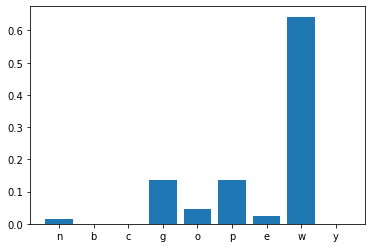

P(Xstalk−color−below−ring|Y=e) with Laplace smoothing


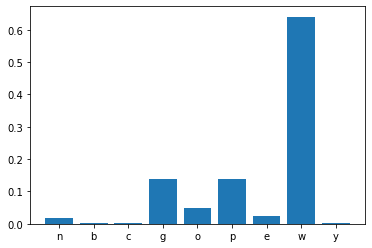

standard deviation of P(Xpetal_length|Y=Iris Versicolour) is :  0.23434343745572453
mean of P(Xpetal_length|Y=Iris Versicolour) is :  4.266666666666667 

the probability density function of assumed P(Xpetal_length|Y=Iris Versicolour)


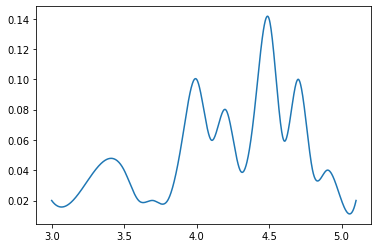

In [40]:
#8. question
#for mushoom dataset
from scipy.interpolate import make_interp_spline, BSpline


dict_mushroom_bar = {'n':0,'b':0,'c':0,'g':0,'o':0,'p':0,'e':0,'w':0,'y':0}
count_e = 0

for i in range(len(agar_list_y)):
    if chr(agar_list_y[i]) == 'e':
        count_e += 1 
        dict_mushroom_bar[chr(agar_feature_extract[i][14])] += 1

print("P(Xstalk−color−below−ring|Y=e) without Laplace smoothing")
x_list = []
y_list = []
for key,values in dict_mushroom_bar.items():
    x_list.append(key)
    y_list.append(values/count_e)

plt.bar(x_list,y_list)
plt.show()

print("P(Xstalk−color−below−ring|Y=e) with Laplace smoothing")
m = 9
a = 1
y_list2 = []
for key,values in dict_mushroom_bar.items():
    y_list2.append((values + m)/(count_e + m*k))
    
plt.bar(x_list,y_list2)
plt.show()

#for iris dataset
#get sigma(standard deviation) and theta(mean) of iris
iris_clf.fit(iris_train_x,iris_train_y)
print("standard deviation of P(Xpetal_length|Y=Iris Versicolour) is : ",iris_clf.sigma_[1][2])
print("mean of P(Xpetal_length|Y=Iris Versicolour) is : ",iris_clf.theta_[1][2],"\n")

#get the PDF for P(Xpetal_length|Y=Iris Versicolour)
print("the probability density function of assumed P(Xpetal_length|Y=Iris Versicolour)")
iris_list_x = []
iris_list_y = []
dict_distribute = {}
for i in range(len(iris_data)-1):
    list_now = []
    iris_list_y.append(iris_data.iloc[i][4])
    for j in range(len(iris_data.iloc[i])-1):
        list_now.append(float(iris_data.iloc[i][j]))
    iris_list_x.append(list_now)
    
    
count_versi = 0
for i in range(len(iris_list_x)):
    if iris_list_y[i] == "Iris-versicolor":
        count_versi += 1
        if iris_list_x[i][2] in dict_distribute:
            dict_distribute[iris_list_x[i][2]] += 1
        else:
            dict_distribute[iris_list_x[i][2]] = 1

            
x_list = sorted(dict_distribute.keys())
y_list = []
for key in x_list:
    y_list.append(dict_distribute[key]/50)

x_newlist = np.array(x_list)
y_newlist = np.array(y_list)
x_new_list = np.linspace(x_newlist.min(),x_newlist.max(),1000)
spl = make_interp_spline(x_list,y_list)
y_new_list = spl(x_new_list)
plt.plot(x_new_list,y_new_list)
plt.show()
